# Import Library


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import Data


### Distance matrix (50 nodes)

In [17]:
# Distance matrix 50 node
df_distance = pd.read_excel(r'C:\rl-meta-test\src\Source\VRP_50_node.xlsx', sheet_name="Sheet1")
distance = df_distance.iloc[:,1:].to_numpy()
kwargs = {"distance": distance}


# Differential Evolutional Algorithm Parameters

In [18]:
dimensions = len(distance) - 1
maxiters = 4
n_pop = 4
bounds = np.array([[0, 1]] * dimensions)
Mutation_rate = np.array([0.9, 0.5])
Crossover_rate = np.array([0.5, 0.1])

# Differential Evolutional Algorithm


In [19]:
def differential_evolution(
    objective_func,
    bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
):
    # Initialize population
    population = np.random.uniform(
        bounds[:, 0], bounds[:, 1], (population_size, len(bounds))
    )
    global_solution = np.array([])
    Upperbound_Mutation = Mutation_rate[1]
    Lowerbound_Mutation = Mutation_rate[0]
    Upperbound_Crossover_rate = Crossover_rate[1]
    Lowerbound_Crossover_rate = Crossover_rate[0]
    F = Mutation_rate[0]
    CR = Crossover_rate[0]
    for generation in range(max_generations):
        # print(f'Iteration {generation}')
        current_cost = np.array([])
        F += (Upperbound_Mutation - Lowerbound_Mutation) / max_generations
        CR += (Upperbound_Crossover_rate - Lowerbound_Crossover_rate) / max_generations
        for i in range(population_size):
            # Mutation
            indices = [idx for idx in range(population_size) if idx != i]
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = population[i] + F * (b - c)

            # Crossover
            crossover_prob = np.random.rand(len(bounds))
            trial = np.where(crossover_prob < CR, mutant, population[i])

            # Selection
            fitness_trial = objective_func(trial, **kwargs)
            fitness_current = objective_func(population[i], **kwargs)

            if fitness_trial < fitness_current:
                population[i] = trial
                current_cost = np.insert(current_cost, len(current_cost), fitness_trial)
            else:
                current_cost = np.insert(
                    current_cost, len(current_cost), fitness_current
                )
            #print(f"population {i}")
            #print(f"current_cost{current_cost}")
            #print("---------" * 30)
        best_index_plot = current_cost[np.argmin(current_cost)]
        global_solution = np.insert(
            global_solution, len(global_solution), best_index_plot
        )

    # Find the best solution
    best_index = np.argmin(
        [objective_func(individual, **kwargs) for individual in population]
    )
    best_solution = population[best_index]

    return best_solution, global_solution

# Objective Function Evolution


In [20]:
def objective_func(x, **kwargs):
    """Decoding of each particles for obtaining routing solutions by argsort()"""
    print('---'*30)
    print(f"len of array: {len(x)}")
    print(x)
    print('---'*30)
    seq = x.argsort() + 1
    """Calculate objective function for obtaining objective value of each particle"""
    j = f_per_particle(seq, **kwargs)
    return np.array(j)


def f_per_particle(m, **kwargs):
    X = m  # Sequence
    obj_val = preserving_strategy(X, **kwargs)  # Call Preserving strategy.
    return obj_val


def preserving_strategy(X, **kwargs):
    # distance matrix
    distance = kwargs["distance"]
    # total distance starts from zero km.
    total_distance = 0
    # Vehicle travel from depot to customer i
    total_distance += distance[0][X[0]]
    # Total distance of routing solution
    for i in range(len(X) - 1):
        total_distance += distance[X[i]][X[i + 1]]
    # Vehicle returns to depot
    total_distance += distance[X[-1]][0]
    # Return total distance (km.) that vehicle traveled
    return total_distance

# Finding Solution


In [21]:
start_algorithm = time.time()
best_solution, global_solution_plot = differential_evolution(
    objective_func,
    bounds=bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
)
End_algorithm = time.time()
run_algorithm = End_algorithm - start_algorithm

------------------------------------------------------------------------------------------
len of array: 49
[-0.27941636  1.40119325  0.5184952   0.34331347  0.34845239  0.40669824
  0.44655097  0.26380216  0.82160282  0.34715802  0.42943597  0.86042721
 -0.33935124  0.60551044  0.49704539  0.09068271  0.64793866  0.31257876
  0.51468606  0.78291755  0.19736193  0.85862022  0.41862364  0.61368624
 -0.04776955  0.80907616  0.61510145  0.84723718  0.28412284 -0.43993297
  0.6901671   0.27558573  0.39547725  0.44542982  0.77651662  0.56975405
  0.92402318  0.22305489  0.6021774   0.69577122  0.14364035  0.49986502
  0.07961913  0.50642788  0.80130979  0.27591446  0.48504906  0.19647381
  0.47774915]
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
len of array: 49
[0.44504804 0.97339707 0.5184952  0.34331347 0.34845239 0.40669824
 0.84862813 0.05710336 0.821

# Solution


In [22]:
best_solution

array([ 0.57969458,  0.85371799,  0.30016163,  0.29906143,  0.18585189,
        0.2363168 ,  0.3830673 ,  0.789492  , -0.98582594,  0.91680057,
        0.397907  ,  0.37722903,  1.05998483,  0.12344237,  0.35951078,
        0.98573594, -0.26071664,  1.4731461 , -0.26885576,  0.22866881,
        0.45470884,  0.28979233,  0.82755865,  0.78168273,  0.04497606,
        0.60225584,  0.23048271,  1.06250293,  0.60839746,  0.01204535,
        0.55950352,  0.60698948,  0.66873116,  0.81003079,  0.99139026,
        1.13864994,  0.49822477,  0.43157073,  0.46781725,  0.50030922,
        0.74193912,  0.59388974,  0.45710861,  0.52850852,  0.35523772,
        0.18621586,  0.44947725,  1.64654915,  0.52225838])

In [23]:
routing = best_solution.argsort() + 1
routing = np.insert(routing, len(routing), 0)
routing = np.insert(routing, 0, 0)
print(f" Routing: {routing}")

 Routing: [ 0  9 19 17 30 25 14  5 46 20 27  6 22  4  3 45 15 12  7 11 38 47 21 43
 39 37 40 49 44 31  1 42 26 32 29 33 41 24  8 34 23  2 10 16 35 13 28 36
 18 48  0]


In [24]:
print(f" Total distance {preserving_strategy(routing[1:-1], **kwargs)} KM.")

 Total distance 4607.022 KM.


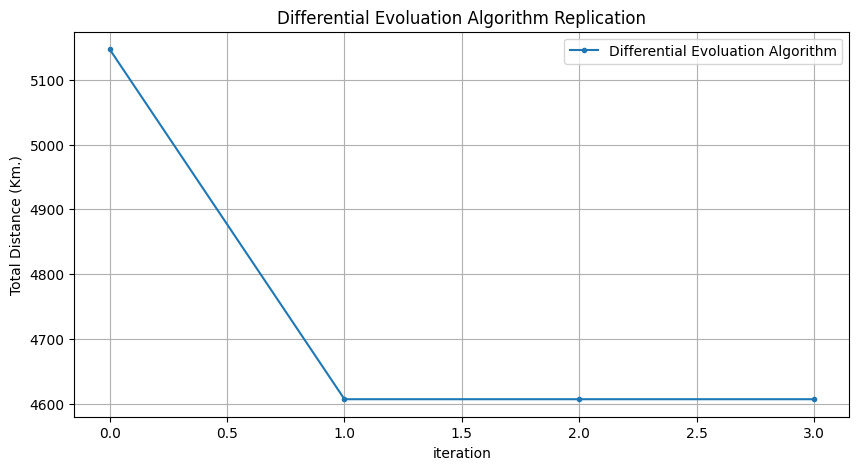

In [25]:
Replication = [i for i in range(len(global_solution_plot))]
y1 = global_solution_plot.tolist()
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(Replication, y1, marker=".", label="Differential Evoluation Algorithm")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title="Differential Evoluation Algorithm Replication",
)
ax.grid()
ax.legend()
plt.show()

# Folium 

In [26]:
import folium

In [27]:
# lattitude and longtitude
df_position = pd.read_excel(r'C:\rl-meta-test\src\Source\VRP_50_node.xlsx', sheet_name="Sheet2")
df_position


,Unnamed: 0,Latitude,Longitude
0,Node1,16.692034,98.519306
1,Node2,17.007926,99.823334
2,Node3,16.833256,100.404008
3,Node4,16.450952,102.749376
4,Node5,16.410365,103.460128
5,Node6,16.602112,104.726311
6,Node7,16.709207,98.550185
7,Node8,16.726069,98.569650
8,Node9,16.722992,98.586170
9,Node10,16.724974,98.594656


In [28]:
data_position = df_position[['Latitude', 'Longitude']].values
position_list = [tuple(coord) for coord in data_position]
position_list

[(np.float64(16.6920339106944), np.float64(98.519305689798)),
 (np.float64(17.0079260927053), np.float64(99.8233342169703)),
 (np.float64(16.8332555318513), np.float64(100.404008244134)),
 (np.float64(16.450951691258), np.float64(102.74937628813)),
 (np.float64(16.410364693011), np.float64(103.460127688226)),
 (np.float64(16.6021119596287), np.float64(104.726311264602)),
 (np.float64(16.7092065174695), np.float64(98.5501853866702)),
 (np.float64(16.7260691723623), np.float64(98.5696495076805)),
 (np.float64(16.7229921582403), np.float64(98.5861699348167)),
 (np.float64(16.7249740787871), np.float64(98.594656001605)),
 (np.float64(16.7251117436782), np.float64(98.5957186256136)),
 (np.float64(16.853005762394), np.float64(99.1164400770002)),
 (np.float64(16.8671382317722), np.float64(99.1357845027271)),
 (np.float64(16.8658629979507), np.float64(99.1357849100604)),
 (np.float64(16.8690753898814), np.float64(99.1242384378976)),
 (np.float64(16.8781590738143), np.float64(99.1283644942217))

In [29]:
# ดึงตำแหน่งตามลำดับ routing และสร้างหมุด+เส้นทางด้วย folium
coordinates = [position_list[i] for i in routing]
for j, coord in enumerate(coordinates):
    folium.Marker(location=coord, popup=f'Point {j+1}').add_to(m)
folium.PolyLine(locations=coordinates, color='blue').add_to(m)
m

NameError: name 'm' is not defined